In [1]:
import numpy as np
import matplotlib.pyplot as plt
from graphviz import Digraph

# Games with Sequential Actions: Reasoning and Computing with the Extensive Form

Chapter 3 and 4 dealt with the Normal-Form representation of a game, in which each agent chooses an action (possibly with some noise), and then we see the outcome. However, it is worth considering another representation: The Extensive-Form game, in which agents take a series of actions one after the other.

## 5.1 Perfect-information extensive-form games

In a perfect-information extensive-form game the decision of each player is a pure strategy, given the actions that were taken before. I.e., the actions form a tree. Consider the following, where player 1's actions are highlighted in black, and player 2 in red:

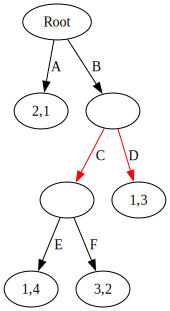

In [2]:
graph1 = Digraph()
graph1.node('Root', 'Root')
graph1.node('A', '2,1')
graph1.node('B', '')
graph1.edge('Root', 'A','A',color="black")
graph1.edge('Root', 'B','B',color="black")
graph1.node('C', '')
graph1.node('D', '1,3')
graph1.edge('B', 'C','C',color="red")
graph1.edge('B', 'D','D',color="red")
graph1.node('E', '1,4')
graph1.node('F', '3,2')
graph1.edge('C', 'E','E',color="black")
graph1.edge('C', 'F','F',color="black")
display(graph1)

## 5.2 Strategies and equilibria

All extensive-form games can be converted to normal-form games by taking the combination of all decisions at all nodes. For instance, in the game above player 1 has two decision nodes, then combination of which gives 4 strategies $(A,E),(A,F),(B,E),(B,F)$. Note, a strategy specifies the value at nodes even if it won't reach them. For instance, $(A,E)$ and $(A,F)$ above. This gives the normal-form game:

$
\begin{array}{c|cc}
\text{} & \text{C} & \text{D} \\
\hline
\text{A,E} & 2,1 & 2,1 \\
\text{A,F} & 2,1 & 2,1 \\
\text{B,E} & 1,4 & 1,3 \\
\text{B,F} & 3,2 & 1,3 \\
\end{array}
$

Notice that this game has an unfortunate equilibrium where player 1 simply does $A$. This is because if player 1 went $B$ then player 2 would go $D$, which is worse for player 1 than $A$. Player 2 would go $D$ because if it went $C$ player 1 would go $E$, which leave 2 worse off. We want to capture this intuitive stuff, rather than having to look at the normal-form version of the game. Notice that the value of being at a decision node is whatever the value is for the best child node according to the current agent. So we can back-calculate the values:

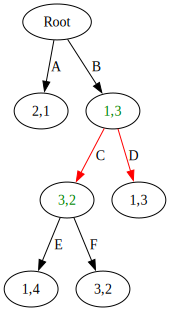

In [3]:
graph2 = Digraph()
graph2.node('Root', 'Root')
graph2.node('A', '2,1')
graph2.node('B', '1,3',fontcolor="green")
graph2.edge('Root', 'A','A',color="black")
graph2.edge('Root', 'B','B',color="black")
graph2.node('C', '3,2',fontcolor="green")
graph2.node('D', '1,3')
graph2.edge('B', 'C','C',color="red")
graph2.edge('B', 'D','D',color="red")
graph2.node('E', '1,4')
graph2.node('F', '3,2')
graph2.edge('C', 'E','E',color="black")
graph2.edge('C', 'F','F',color="black")
display(graph2)

## 5.3 Subgame-perfect equilibrium

There is a problem however with just representing a perfect-information game in normal-form. Consider the following:

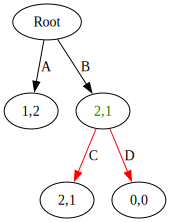

In [4]:
graph3 = Digraph()
graph3.node('Root', 'Root')
graph3.node('A', '1,2')
graph3.node('B', '2,1',fontcolor="green")
graph3.edge('Root', 'A','A',color="black")
graph3.edge('Root', 'B','B',color="black")
graph3.node('C', '2,1')
graph3.node('D', '0,0')
graph3.edge('B', 'C','C',color="red")
graph3.edge('B', 'D','D',color="red")
display(graph3)

This game should lead to the exact same situation as before, but if we look at the normal-form game...

$
\begin{array}{c|cc}
\text{} & \text{C} & \text{D} \\
\hline
\text{A} & 1,2 & 1,2 \\
\text{B} & 2,1 & 0,0 \\
\end{array}
$

Notice that AD is an equilibrium, as well as BC. This is what you would get if both players had to choose a set of decisions before the game and then play them out. The issue is that in reality if player 1 goes B, player 2 *should* go C. D is acting as a threat, but not one player 2 would follow through on. In reality BC should be the only equilibrium. To make this more clear we introduce the idea of **Subgame-perfect equilibrium**.

A subgame for a node is the restriction of actions of the game to the children of that node. I.e., in the above the node B has a subgame in which player 2 chooses between C and D. 

A subgame-perfect equilibrium is a set of strategies such that every subgame is at Nash equilibria. This is a stronger concept than Nash equilibria, so every subgame-perfect equilibrium will also be a Nash equilibrium, but not necessarily vice versa.

In the above case we can rule out the Nash equilibria at AD, because D is not a Nash equilibria for the subgame at B.

### 5.1.4 Computing-equilibria: backwards induction

If we use the logic from before to calculate backwards we will have a solution which guarantees it is subgame-perfect. The benefit of this is that it is easy to compute! Linear in comparison to the exponential calculation of Nash equilibria. However, we still have to deal with the problem of having to enumerate a lot of decisions. Games which branch such as Chess are still impossible to solve with this approach.

Also note that this will find a single solution. If we want all subgame-perfect solutions then we would need to also consider all the decisions where two options are equivalent. This is fairly straightforward.

#### 2 player zero-sum games: minimax and alpha-beta pruning

In the 2 player zero-sum game we can represent the state of each node with a single number - the value to player 1. Then depending on the depth we are either taking the maximum or minimum of the values. There is an extension of this called alpha-beta pruning which avoids the need to loop through all branches. Consider the following game:

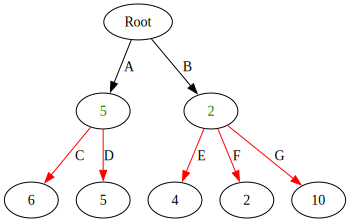

In [12]:
graph4 = Digraph()
graph4.node('Root', 'Root')
graph4.node('A', '5',fontcolor="green")
graph4.node('B', '2',fontcolor="green")
graph4.edge('Root', 'A','A',color="black")
graph4.edge('Root', 'B','B',color="black")
graph4.node('C', '6')
graph4.node('D', '5')
graph4.node('E', '4')
graph4.node('F', '2')
graph4.node('G', '10')
graph4.edge('A', 'C','C',color="red")
graph4.edge('A', 'D','D',color="red")
graph4.edge('B', 'E','E',color="red")
graph4.edge('B', 'F','F',color="red")
graph4.edge('B', 'G','G',color="red")
display(graph4)

Notice that if we have explored the node A then we know that the first player can guarantee at least a score of 5. Then say we have a look at the option B. If we take the first branch we can see that player 2 can reduce the score to 4. This means we no longer even need to explore nodes F and G, and can just rule out node B straight away. This is the essence of the alpha-beta pruning algorithm.

#### A critism of backward induction

Consider this game:

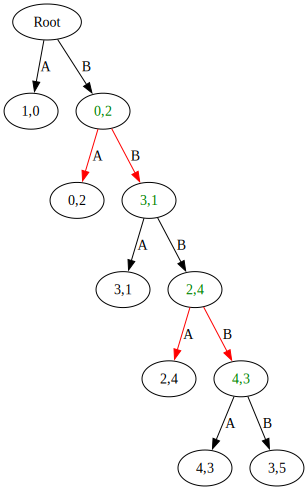

In [21]:
graph5 = Digraph()
graph5.node('Root', 'Root')
graph5.node('A', '1,0')
graph5.node('B', '0,2',fontcolor="green")
graph5.edge('Root', 'A','A',color="black")
graph5.edge('Root', 'B','B',color="black")
graph5.node('C', '0,2')
graph5.node('D', '3,1',fontcolor="green")
graph5.edge('B', 'C','A',color="red")
graph5.edge('B', 'D','B',color="red")
graph5.node('E', '3,1')
graph5.node('F', '2,4',fontcolor="green")
graph5.edge('D', 'E','A',color="black")
graph5.edge('D', 'F','B',color="black")
graph5.node('G', '2,4')
graph5.node('H', '4,3',fontcolor="green")
graph5.edge('F', 'G','A',color="red")
graph5.edge('F', 'H','B',color="red")
graph5.node('I', '4,3')
graph5.node('J', '3,5')
graph5.edge('H', 'I','A',color="black")
graph5.edge('H', 'J','B',color="black")
display(graph5)

Notice that backward induction provides the green values, which leads to player 1 making the decision to go A straight away. This seems wrong! The rewards for both players are much higher later on. The fundamental issue is that we are assuming a shared knowledge of rationality in both agents. The first decision of player 2 according to rational analysis should never even come about. So what to do if it does? This raises the problem of how to allow room for irrational players and incomplete information.